<a href="https://colab.research.google.com/github/NishaMurarka11/tensorflowlab/blob/main/nvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [84]:
test_data = pd.read_csv("/content/drive/MyDrive/Test_data.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Train_data.csv")

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def displayConfusionMatrix(y_test , y_predicted, title):
  mat = confusion_matrix(y_test, y_predicted)
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
  plt.title(title)


In [86]:
train_data = train_data.dropna()


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train_data.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train_data.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test_data.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)


In [ ]:
!pip install tensorflow-transform

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train_data.select_dtypes(include=['object']).copy()
cattest = test_data.select_dtypes(include=['object']).copy()
print(cattrain)
# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
print(enctrain)
cat_Ytrain = traincat[['class']].copy()

      protocol_type   service  flag    class
0               tcp  ftp_data    SF   normal
1               udp     other    SF   normal
2               tcp   private    S0  anomaly
3               tcp      http    SF   normal
4               tcp      http    SF   normal
...             ...       ...   ...      ...
25187           tcp      exec  RSTO  anomaly
25188           tcp  ftp_data    SF  anomaly
25189           tcp   private   REJ  anomaly
25190           tcp      nnsp    S0  anomaly
25191           tcp    finger    S0  anomaly

[25192 rows x 4 columns]
       protocol_type  service  flag
0                  1       19     9
1                  2       41     9
2                  1       46     5
3                  1       22     9
4                  1       22     9
...              ...      ...   ...
25187              1       16     2
25188              1       19     9
25189              1       46     1
25190              1       38     5
25191              1       17     5

[

In [107]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_data['result'] = [
    1 if typ == 'normal' else 0 for typ in train_data['class']
]
train_y = train_data['result']
train_x.shape

(25192, 41)

In [108]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape


(22544, 41)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(7558, 41)
(17634, 41)
(17634,)
(7558,)


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [111]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

Y_train = np.array(Y_train)
history = model.fit(X_train_scaled, Y_train, epochs=10)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


552/552 [==============================] - 3s 4ms/step - loss: 0.3656 - accuracy: 0.9555 - precision: 0.9448 - recall: 0.9734
Epoch 2/10
552/552 [==============================] - 2s 4ms/step - loss: 0.2033 - accuracy: 0.9587 - precision: 0.9493 - recall: 0.9745
Epoch 3/10
552/552 [==============================] - 2s 4ms/step - loss: 0.2058 - accuracy: 0.9443 - precision: 0.9519 - recall: 0.9430
Epoch 4/10
552/552 [==============================] - 2s 4ms/step - loss: 0.0883 - accuracy: 0.9720 - precision: 0.9929 - recall: 0.9543
Epoch 5/10
552/552 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9777 - precision: 0.9898 - recall: 0.9682
Epoch 6/10
552/552 [==============================] - 2s 4ms/step - loss: 0.0796 - accuracy: 0.9792 - precision: 0.9913 - recall: 0.9694
Epoch 7/10
552/552 [==============================] - 2s 4ms/step - loss: 0.0669 - accuracy: 0.9795 - precision: 0.9910 - recall: 0.9703
Epoch 8/10
552/552 [==============================] 

In [128]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['recall'], label='recall')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

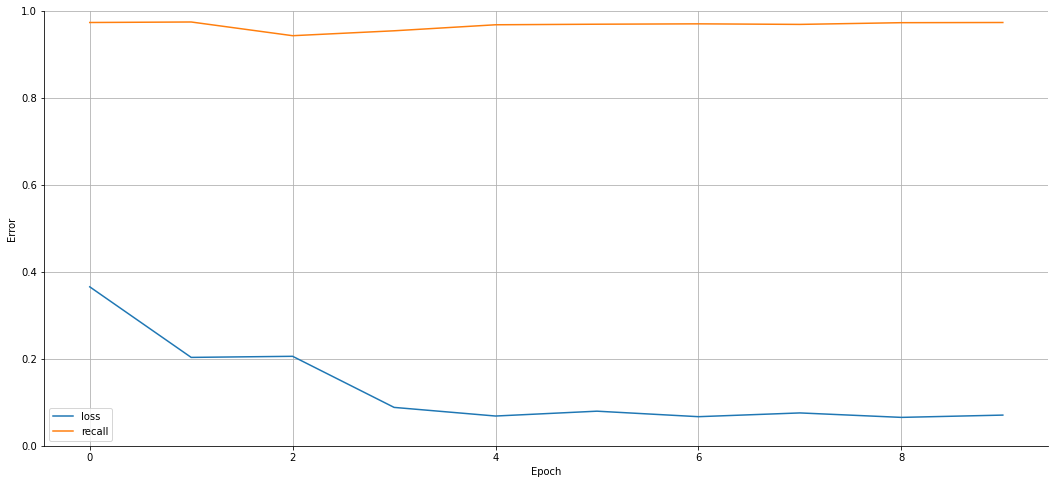

In [129]:
plot_loss(history)
predictions = model.predict(X_test_scaled)

[[3434   64]
 [ 130 3930]]


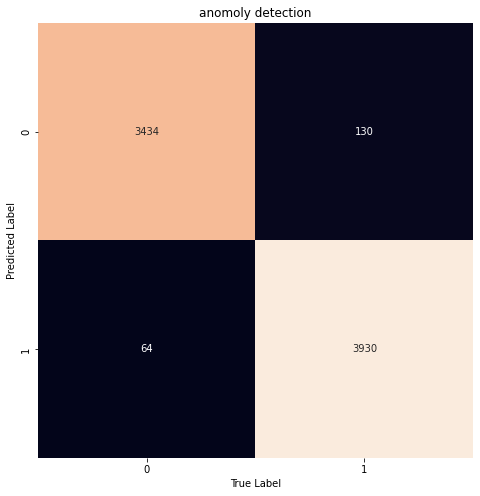

In [113]:
from sklearn.metrics import confusion_matrix
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
print(confusion_matrix(Y_test, prediction_classes))
displayConfusionMatrix(Y_test,prediction_classes,"anomoly detection")

In [131]:
label = "class"

classes = train_data[label].unique().tolist()
print(f"Label classes: {classes}")

train_data[label] = train_data[label].map(classes.index)

Label classes: ['normal', 'anomaly']


In [132]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(train_data)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

17642 examples in training, 7550 examples for testing.


In [133]:
import tensorflow_decision_forests as tfdf
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [135]:
model_1 = tfdf.keras.RandomForestModel()
model_1.fit(x=train_ds)

Use /tmp/tmpcve7y9f1 as temporary training directory
Starting reading the dataset
17/18 [===========================>..] - ETA: 0s
Dataset read in 0:00:07.928955
Training model
Model trained in 0:00:03.945701
Compiling model
18/18 [==============================] - 12s 271ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [136]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

8/8 [==============================] - 1s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000

loss: 0.0000
accuracy: 1.0000


In [143]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [138]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (42):
	count
	diff_srv_rate
	dst_bytes
	dst_host_count
	dst_host_diff_srv_rate
	dst_host_rerror_rate
	dst_host_same_src_port_rate
	dst_host_same_srv_rate
	dst_host_serror_rate
	dst_host_srv_count
	dst_host_srv_diff_host_rate
	dst_host_srv_rerror_rate
	dst_host_srv_serror_rate
	duration
	flag
	hot
	is_guest_login
	is_host_login
	land
	logged_in
	num_access_files
	num_compromised
	num_failed_logins
	num_file_creations
	num_outbound_cmds
	num_root
	num_shells
	protocol_type
	rerror_rate
	result
	root_shell
	same_srv_rate
	serror_rate
	service
	src_bytes
	srv_count
	srv_diff_host_rate
	srv_rerror_rate
	srv_serror_rate
	su_attempted

In [139]:
model_1.make_inspector().features()

["count" (1; #0),
 "diff_srv_rate" (1; #1),
 "dst_bytes" (1; #2),
 "dst_host_count" (1; #3),
 "dst_host_diff_srv_rate" (1; #4),
 "dst_host_rerror_rate" (1; #5),
 "dst_host_same_src_port_rate" (1; #6),
 "dst_host_same_srv_rate" (1; #7),
 "dst_host_serror_rate" (1; #8),
 "dst_host_srv_count" (1; #9),
 "dst_host_srv_diff_host_rate" (1; #10),
 "dst_host_srv_rerror_rate" (1; #11),
 "dst_host_srv_serror_rate" (1; #12),
 "duration" (1; #13),
 "flag" (4; #14),
 "hot" (1; #15),
 "is_guest_login" (1; #16),
 "is_host_login" (1; #17),
 "land" (1; #18),
 "logged_in" (1; #19),
 "num_access_files" (1; #20),
 "num_compromised" (1; #21),
 "num_failed_logins" (1; #22),
 "num_file_creations" (1; #23),
 "num_outbound_cmds" (1; #24),
 "num_root" (1; #25),
 "num_shells" (1; #26),
 "protocol_type" (4; #27),
 "rerror_rate" (1; #28),
 "result" (1; #29),
 "root_shell" (1; #30),
 "same_srv_rate" (1; #31),
 "serror_rate" (1; #32),
 "service" (4; #33),
 "src_bytes" (1; #34),
 "srv_count" (1; #35),
 "srv_diff_host_

In [140]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=17642, accuracy=1.0, loss=0.0012141779162160307, rmse=None, ndcg=None, aucs=None)

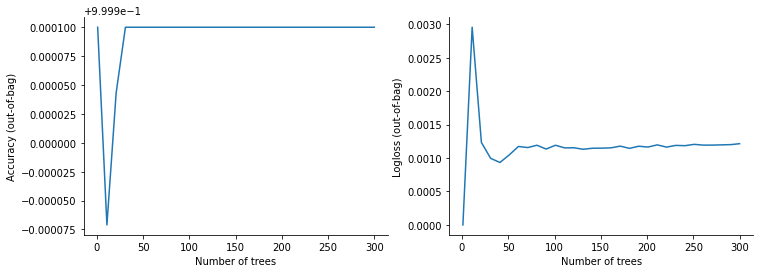

In [141]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()